In [10]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
pd.set_option('max_rows',None)
pd.set_option('display.max_columns',500)

In [12]:
df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
# determining the number of rows and columns
df.shape

(307511, 122)

In [14]:
# Differentiation of Datatypes.
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [15]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [16]:
# Basic summary
round(df.describe(),3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,3.075110e+05,307511.000,307499.000,307233.000,307511.000,307511.000,307511.000,307511.000,307511.000,104582.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307509.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,134133.000,306851.000,246546.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,159080.000,306490.000,306490.000,306490.000,306490.000,307510.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,265992.000,265992.000,265992.000,265992.000,265992.000,265992.000
mean,278180.519,0.081,0.417,1.687979e+05,599026.000,27108.574,538396.207,0.021,-16036.995,63815.046,-4986.120,-2994.202,12.061,1.000,0.820,0.199,0.998,0.281,0.057,2.153,2.052,2.032,12.063,0.015,0.051,0.041,0.078,0.230,0.180,0.502,0.514,0.511,0.117,0.088,0.978,0.752,0.045,0.079,0.150,0.226,0.232,0.066,0.101,0.107,0.009,0.028,0.114,0.088,0.977,0.760,0.043,0.074,0.145,0.222,0.228,0.065,0.106,0.106,0.008,0.027,0.118,0.088,0.978,0.756,0.045,0.078,0.149,0.226,0.232,0.067,0.102,0.109,0.009,0.028,0.103,1.422,0.143,1.405,0.100,-962.859,0.000,0.710,0.000,0.015,0.088,0.000,0.081,0.004,0.000,0.004,0.000,0.004,0.003,0.001,0.010,0.000,0.008,0.001,0.001,0.000,0.006,0.007,0.034,0.267,0.265,1.900
std,102790.175,0.272,0.722,2.371231e+05,402490.777,14493.737,369446.461,0.014,4363.989,141275.767,3522.886,1509.450,11.945,0.002,0.384,0.400,0.043,0.450,0.231,0.911,0.509,0.503,3.266,0.122,0.220,0.197,0.268,0.421,0.384,0.211,0.191,

In [17]:
# Missing values
null_count = round(df.isnull().sum() *100/ len(df.index),2)
null_count

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [19]:
# columns that have high percentage of missing values
null_count= null_count[null_count>=50]
null_count

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [21]:
len(null_count)

41

### Here, we have 41 columns having the highest percentage of missing values(greater than 50 %). So we remove those columns.

In [22]:
# Remove Missing values
df = df.drop(null_count.index , axis =1)
df.shape

(307511, 81)

### Now, there are some columns that have missing percentage. Since, this is a huge dataset we are able to remove those columns. However, if we try to impute these values there might be a chance of biasness occurring in the dataset.

In [23]:
# Dropping unnecessary columns from the dataframe.
Drop_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI']

In [24]:
df = df.drop(Drop_col, axis = 1)
df.shape

(307511, 42)

In [25]:
# checking the percentage of columns after dropping the unnecessary columns.
df.isnull().sum()*100 / len(df.index)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

In [26]:
round(df.describe(),3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,3.075110e+05,307511.000,307499.000,307233.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,306851.000,306490.000,306490.000,306490.000,306490.000,265992.000,265992.000,265992.000,265992.000,265992.000,265992.000
mean,278180.519,0.081,0.417,1.687979e+05,599026.000,27108.574,538396.207,0.021,-16036.995,63815.046,-4986.120,-2994.202,12.063,0.015,0.051,0.041,0.078,0.230,0.180,0.514,1.422,0.143,1.405,0.100,0.006,0.007,0.034,0.267,0.265,1.900
std,102790.175,0.272,0.722,2.371231e+05,402490.777,14493.737,369446.461,0.014,4363.989,141275.767,3522.886,1509.450,3.266,0.122,0.220,0.197,0.268,0.421,0.384,0.191,2.401,0.447,2.380,0.362,0.084,0.111,0.205,0.916,0.794,1.869
min,100002.000,0.000,0.000,2.565000e+04,45000.000,1615.500,40500.000,0.000,-25229.000,-17912.000,-24672.000,-7197.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,189145.500,0.000,0.000,1.125000e+05,270000.000,16524.000,238500.000,0.010,-19682.000,-2760.000,-7479.500,-4299.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.392,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,278202.000,0.000,0.000,1.471500e+05,513531.000,24903.000,450000.000,0.019,-15750.000,-1213.000,-4504.000,-3254.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,0.566,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,367142.500,0.000,1.000,2.025000e+05,808650.000,34596.000,679500.000,0.029,-12413.000,-289.000,-2010.000,-1720.000,14.000,0.000,0.000,0.000,0.000,0.000,0.000,0.664,2.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
max,456255.000,1.000,19.000,1.170000e+08,4050000.000,258025.500,4050000.000,0.073,-7489.000,365243.000,0.000,0.000,23.000,1.000,1.000,1.000,1.000,1.000,1.000,0.855,348.000,34.000,344.000,24.000,4.000,9.000,8.000,27.000,261.000,25.000


In [27]:
null_value = df[['AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','OCCUPATION_TYPE','EXT_SOURCE_2']]
round(null_value.describe(),3)

,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2
count,307499.000,307233.000,306851.000
mean,27108.574,538396.207,0.514
std,14493.737,369446.461,0.191
min,1615.500,40500.000,0.000
25%,16524.000,238500.000,0.392
50%,24903.000,450000.000,0.566
75%,34596.000,679500.000,0.664
max,258025.500,4050000.000,0.855


In [28]:
# Missing values in AMT_ANNUITY variable 
print(df['AMT_ANNUITY'].isnull().sum())
print(float(100*(12/307511)))

12
0.003902299429939092


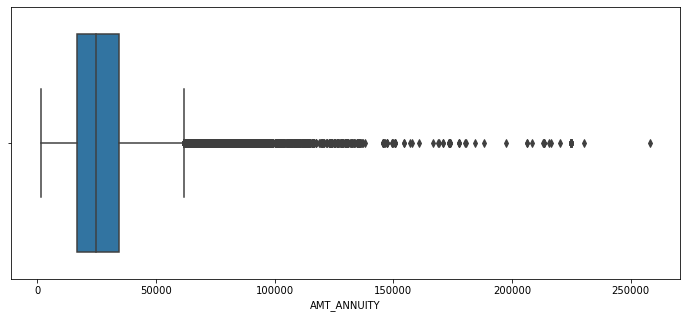

In [29]:
plt.figure(figsize=[12,5])
sns.boxplot(x = df['AMT_ANNUITY'])
plt.show()

### Since, there are outliers present in this column, median value will be imputed to fill the missing values : 24903.

In [30]:
# Missing values in AMT_GOODS_PRICE
print(df['AMT_GOODS_PRICE'].isnull().sum())
print(float(100*(278/307511)))

278
0.09040327012692229


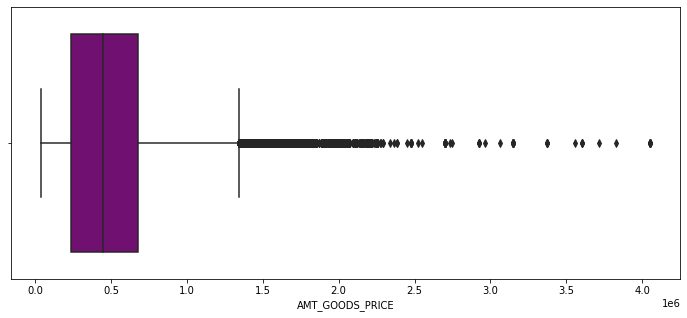

In [31]:
plt.figure(figsize=[12,5])
sns.boxplot(x = df['AMT_GOODS_PRICE'],color = 'purple')
plt.show()

### AMT_GOODS_PRICE has less percentage of missing values and also has outliers. These missing values can be imputed with median value : 450000

In [32]:
print(df['EXT_SOURCE_2'].isnull().sum())

660


In [33]:
float(100*(660/307511))

0.21462646864665005

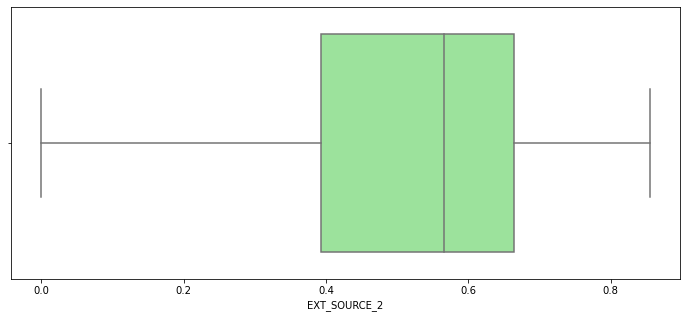

In [34]:
plt.figure(figsize=[12,5])
sns.boxplot(x = df['EXT_SOURCE_2'], color = 'lightgreen')
plt.show()

### For this section, there are no outliers present and there is no such significant difference observed between  mean and median. Hence the missing values are filled with median value :0.566

In [35]:
# Missing values in NAME_TYPE_SUITE column.
df['NAME_TYPE_SUITE'].isnull().sum()

1292

In [36]:
float(100*(1292/307511))

0.42014757195677555

In [37]:
df['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [38]:
# find the mode of this column.
mode1 = df['NAME_TYPE_SUITE'].mode()
mode1

0    Unaccompanied
dtype: object

### Here, NAME_TYPE_SUITE being a categorical column, has 0.42 % of missing values. Moreover, Unaccompanied is the popular category so we can impute the missing value by this one. 

In [39]:
# Missing values in OCCUPATION_TYPE column.
df['OCCUPATION_TYPE'].isnull().sum()

96391

In [40]:
float(100*(96931/307511))

31.52114883695217

In [41]:
df['OCCUPATION_TYPE'].value_counts(normalize = True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [42]:
# find the mode of this column.
mode2 = df['OCCUPATION_TYPE'].mode()
mode2

0    Laborers
dtype: object

###  Here, OCCUPATION_TYPE is also a categorical variable, has about 31% of missing values. So we can impute the missing values with the most popular category and that is Laborers.

In [43]:
print('OBS_30 :',df['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])

print('OBS_60 :',df['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])

print('DEF_30 :',df['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])

print('DEF_60 :',df['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])

OBS_30 : 0.0
OBS_60 : 0.0
DEF_30 : 0.0
DEF_60 : 0.0


In [44]:
# Unique values from each column
# if the number of unique values are less than equal to 40: Its a categorical Column
# If the number of unique values in column are greater than 41 :Continuous.
df.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_LIVE_REGION          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REG_REGION_NOT_WORK_REGION          2
CODE_GENDER                         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_MON          24
HOUR_APPR_PR

In [45]:
# changing negative ages to positive ages
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
round(df['DAYS_BIRTH'].describe(),2)

count    307511.00
mean      16037.00
std        4363.99
min        7489.00
25%       12413.00
50%       15750.00
75%       19682.00
max       25229.00
Name: DAYS_BIRTH, dtype: float64

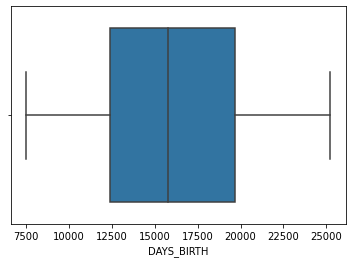

In [46]:
sns.boxplot(df['DAYS_BIRTH'])
plt.show()

In [47]:
# There are no outliers and there is no much difference between mean and median.

In [48]:
# changing negative days to positive days
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])
round(df['DAYS_EMPLOYED'].describe(),2)

count    307511.00
mean      67724.74
std      139443.75
min           0.00
25%         933.00
50%        2219.00
75%        5707.00
max      365243.00
Name: DAYS_EMPLOYED, dtype: float64

In [49]:
# changing negative days to positive days
df['DAYS_REGISTRATION'] = abs(df['DAYS_REGISTRATION'])
round(df['DAYS_REGISTRATION'].describe(),2)

count    307511.00
mean       4986.12
std        3522.89
min           0.00
25%        2010.00
50%        4504.00
75%        7479.50
max       24672.00
Name: DAYS_REGISTRATION, dtype: float64

In [50]:
#changing negative days to positive 
df['DAYS_ID_PUBLISH'] = abs(df['DAYS_ID_PUBLISH'])
round(df['DAYS_ID_PUBLISH'].describe(),2)

count    307511.00
mean       2994.20
std        1509.45
min           0.00
25%        1720.00
50%        3254.00
75%        4299.00
max        7197.00
Name: DAYS_ID_PUBLISH, dtype: float64

In [51]:
# changing region from INT to OBJECT 
df['REG_REGION_NOT_LIVE_REGION'] = df['REG_REGION_NOT_LIVE_REGION'].astype(object)
df['REG_REGION_NOT_WORK_REGION'] = df['REG_REGION_NOT_WORK_REGION'].astype(object)
df['LIVE_REGION_NOT_WORK_REGION'] = df['LIVE_REGION_NOT_WORK_REGION'].astype(object)

# Changing city from INT to OBJECT 
df['REG_CITY_NOT_LIVE_CITY'] = df['REG_CITY_NOT_LIVE_CITY'].astype(object)
df['REG_CITY_NOT_WORK_CITY'] = df['REG_CITY_NOT_WORK_CITY'].astype(object)
df['LIVE_CITY_NOT_WORK_CITY'] = df['LIVE_CITY_NOT_WORK_CITY'].astype(object)

In [52]:
# AMT_INCOME variable
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

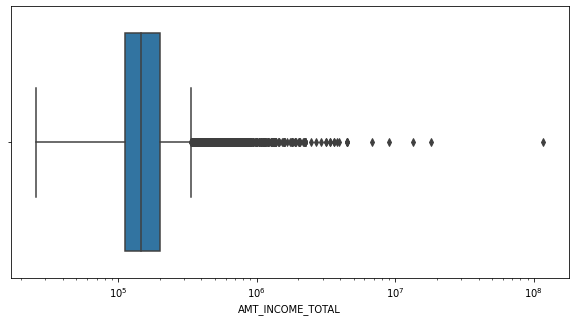

In [53]:
plt.figure(figsize=[10,5])
sns.boxplot(x = df['AMT_INCOME_TOTAL'])
plt.xscale('log')
plt.show()

In [54]:
# creating bins for Credit Amount

bins = [0, 350000, 700000, 1000000000]
slots = ['Low', 'Medium', 'High']
df ['AMT_CREDIT_RANGE'] = pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [55]:
# creating bins for income amount

bins = [0, 200000, 400000, 10000000000]
slot = ['Low', 'Medium', 'High']
df['AMT_INCOME_RANGE'] = pd.cut(df['AMT_INCOME_TOTAL'],bins, labels= slot)

In [56]:
bins = [0 , 7300, 10950, 14600, 18250, 21900, 25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']
df['AGE_RANGE'] = pd.cut(df['DAYS_BIRTH'],bins = bins , labels = slot)

In [57]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,50-60


In [58]:
# checking the imbalance percentage
100*(df['TARGET'].value_counts()/len(df.index))

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

## So the target column has 8% clients have payments difficulties(1's) and 91% are having no difficulties(0's).

In [59]:
# Dividing the dataset into two dataset of target = 1(client with payment difficulties) and 
#target = 0 (rest of the customers).
target_0 = df[df['TARGET']==0]
target_1 = df[df['TARGET']==1]

In [60]:
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,50-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Medium,Low,40-50


## Univariate Analysis for target 0 and 1

Age

<AxesSubplot:title={'center':'Target = 1  vs Age (Payment Issues)'}, xlabel='AGE_RANGE', ylabel='count'>

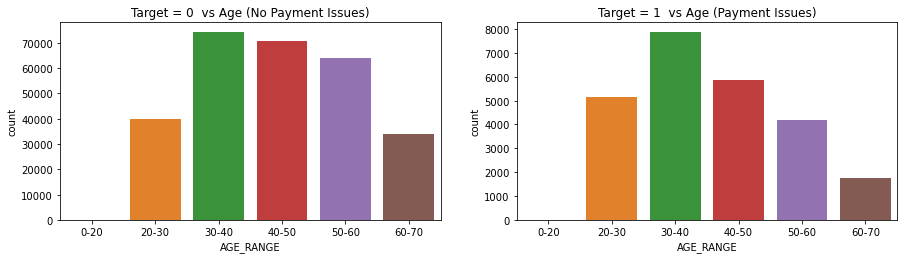

In [61]:
# Plotting graph for both the dataframes
#1
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Target = 0  vs Age (No Payment Issues)')
sns.countplot(x = target_0['AGE_RANGE'])

#2
plt.subplot(2,2,2)
plt.title('Target = 1  vs Age (Payment Issues)')
sns.countplot(x = target_1['AGE_RANGE'])

### The age group from 30 to 50 are able to make the payment on time and these people can be considered while lending loan. Moreover, the customers from 50 to 60 age group are also performing good but this is the particular age group where people are tending towards retirement and enjoying their life so, there might be a risk factor to lend them loans.

Amount credit Range

<AxesSubplot:title={'center':'Credit Amount - Payment Issues'}, xlabel='AMT_CREDIT_RANGE', ylabel='count'>

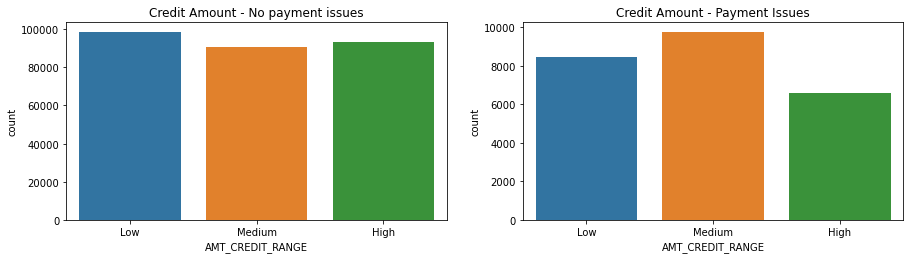

In [62]:
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Credit Amount - No payment issues')
sns.countplot(x = target_0['AMT_CREDIT_RANGE'])

#2
plt.subplot(2,2,2)
plt.title('Credit Amount - Payment Issues')
sns.countplot(x = target_1['AMT_CREDIT_RANGE'])

### Citizens with less and high credit amount are most likely to make the payment.

Occupation_type

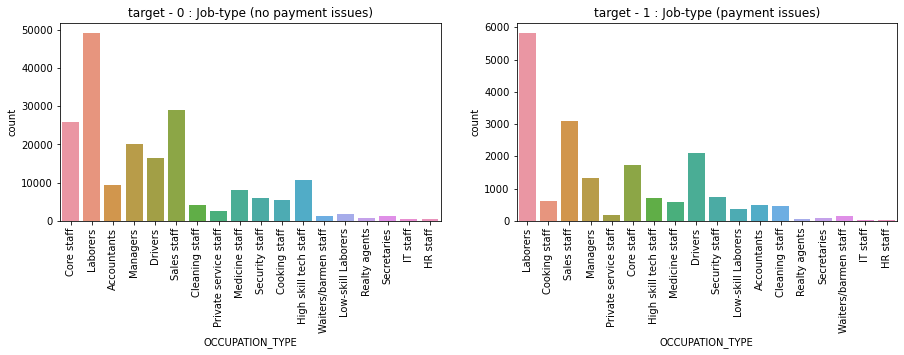

In [63]:
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.xticks(rotation = 90)
plt.title('target - 0 : Job-type (no payment issues)')
sns.countplot(x = target_0['OCCUPATION_TYPE'])

#2
plt.subplot(2,2,2)
plt.title('target - 1 : Job-type (payment issues)')
sns.countplot(x = target_1['OCCUPATION_TYPE'])
plt.xticks(rotation = 90)
plt.show()

### Labrores, sales staff are likely to make the payments on time, however HR staff, IT staff, and Realty agents are less likely to make the payemnt on time.

Income Type

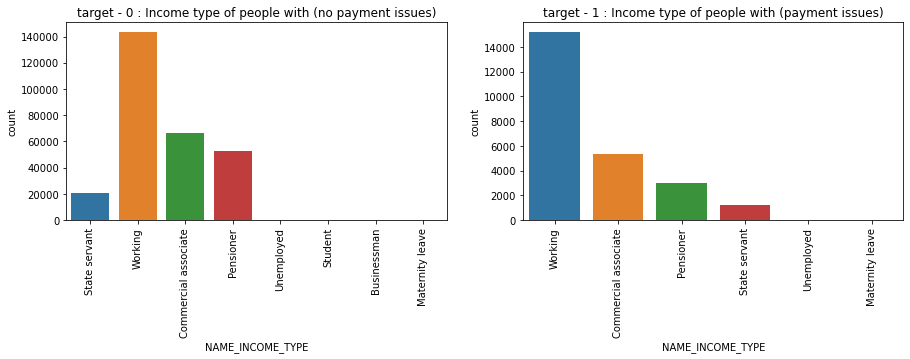

In [64]:
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.xticks(rotation = 90)
plt.title('target - 0 : Income type of people with (no payment issues)')
sns.countplot(x = target_0['NAME_INCOME_TYPE'])

#2
plt.subplot(2,2,2)
plt.title('target - 1 : Income type of people with (payment issues)')
sns.countplot(x = target_1['NAME_INCOME_TYPE'])
plt.xticks(rotation = 90)
plt.show()

### Working Professionals are more inclined to repay the loan whereas lending loan to Pensioner is a bit of a risky task because there is possibility of money not coming back to the bank. This is because there age is a factor which no one can give guarantee about.

Code Gender

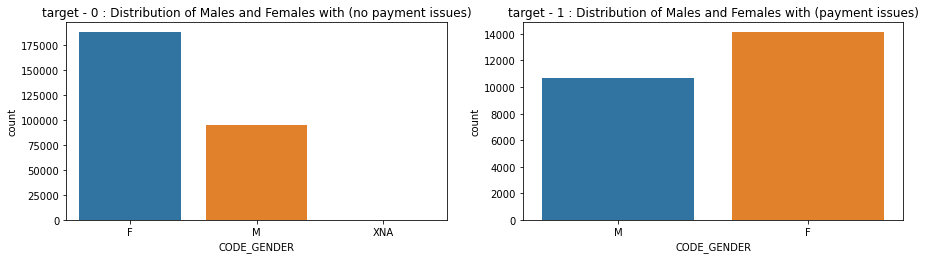

In [65]:
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('target - 0 : Distribution of Males and Females with (no payment issues)')
sns.countplot(x = target_0['CODE_GENDER'])

#2
plt.subplot(2,2,2)
plt.title('target - 1 : Distribution of Males and Females with (payment issues)')
sns.countplot(x = target_1['CODE_GENDER'])
plt.show()

### Banks can give loan to Female citizens compared to the male citizens because they are likely to repay the money back.

EDUCATION TYPE

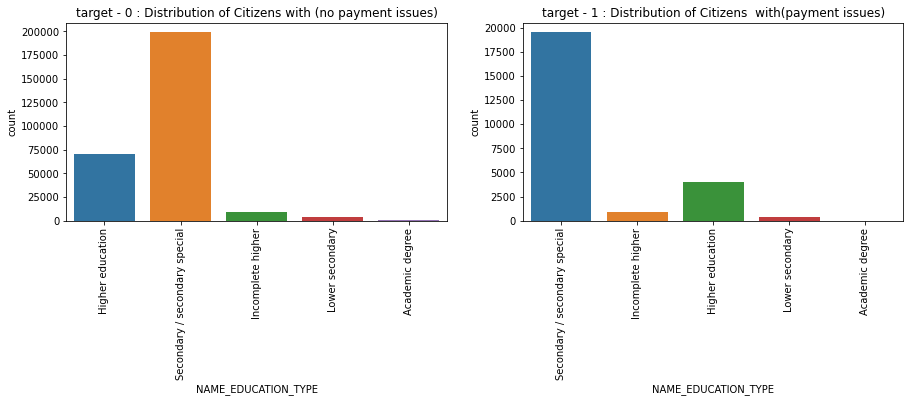

In [66]:
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('target - 0 : Distribution of Citizens with (no payment issues)')
plt.xticks(rotation = 90)
sns.countplot(x = target_0['NAME_EDUCATION_TYPE'])

#2
plt.subplot(2,2,2)
plt.title('target - 1 : Distribution of Citizens  with(payment issues)')
sns.countplot(x = target_1['NAME_EDUCATION_TYPE'])
plt.xticks(rotation = 90)
plt.show()

### Customers with Secondary Education are most likely to make payments when compared to customer with academic degree

## Correlation Matrix

In [67]:
corr = target_0.corr()
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,0.001475,0.000077,-0.000115,0.001589,-0.000695,0.000556,-0.000741,0.002382,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,-0.005244,-0.015455,0.014471,-0.002246,0.014137,-0.002172,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.076743,0.139598,-0.027828,-0.027621,-0.027690,-0.027593,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.053619,0.129140,-0.000914,-0.019851,-0.000892,-0.022225,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.053589,0.126615,-0.013091,-0.022535,-0.012893,-0.023385,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000205,NaN,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,-0.068609,-0.015916,0.003649,0.062766,0.135694,-0.000707,-0.021025,-0.000723,-0.023171,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,0.025244,-0.007198,0.052083,0.001071,0.172814,0.198493,-0.012107,0.005941,-0.011591,0.002255,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775
DAYS_BIRTH,0.001346,NaN,-0.336966,-0.062609,0.047378,-0.012263,0.044565,0.025244,1.000000,0.626114,0.333151,0.271314,-0.095916,0.078158,-0.007726,0.003057,-0.007316,0.000990,-0.004461,-0.002772,0.001069,-0.002855,0.011335,0.072886
DAYS_EMPLOYED,0.001744,NaN,-0.245174,-0.140392,-0.070104,-0.104978,-0.068609,-0.007198,0.626114,1.000000,0.214511,0.276663,-0.095455,-0.028530,0.007272,0.019379,0.007453,0.016383,-0.004460,-0.000874,0.002223,-0.034890,0.015116,0.052169


In [68]:
# to remove the repeated correlation between two variables.
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,0.001475,0.000077,-0.000115,0.001589,-0.000695,0.000556,-0.000741,0.002382,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,NaN,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,-0.005244,-0.015455,0.014471,-0.002246,0.014137,-0.002172,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.076743,0.139598,-0.027828,-0.027621,-0.027690,-0.027593,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.053619,0.129140,-0.000914,-0.019851,-0.000892,-0.022225,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,NaN,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.053589,0.126615,-0.013091,-0.022535,-0.012893,-0.023385,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103827,0.044565,-0.068609,-0.015916,0.003649,0.062766,0.135694,-0.000707,-0.021025,-0.000723,-0.023171,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025244,-0.007198,0.052083,0.001071,0.172814,0.198493,-0.012107,0.005941,-0.011591,0.002255,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626114,0.333151,0.271314,-0.095916,0.078158,-0.007726,0.003057,-0.007316,0.000990,-0.004461,-0.002772,0.001069,-0.002855,0.011335,0.072886
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214511,0.276663,-0.095455,-0.028530,0.007272,0.019379,0.007453,0.016383,-0.004460,-0.000874,0.002223,-0.034890,0.015116,0.052169


In [69]:
 # converting it into a dataframe and sorting it
corrdf1 = corr.unstack().reset_index()
corrdf1 .head()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [70]:
# changing the names of the columns
corrdf1.columns = ['VAR1','VAR2','Correlation']
corrdf1.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [71]:
# Drop the columns having missing data 

corrdf1.dropna(subset=['Correlation'], inplace=True)
corrdf1.head()

,VAR1,VAR2,Correlation
48,CNT_CHILDREN,SK_ID_CURR,-0.000716
72,AMT_INCOME_TOTAL,SK_ID_CURR,0.001739
74,AMT_INCOME_TOTAL,CNT_CHILDREN,0.027397
96,AMT_CREDIT,SK_ID_CURR,-0.000342
98,AMT_CREDIT,CNT_CHILDREN,0.003081


In [72]:
# Rounding off the values 
corrdf1['Correlation'] = round(corrdf1['Correlation'],3)
corrdf1.head()

,VAR1,VAR2,Correlation
48,CNT_CHILDREN,SK_ID_CURR,-0.001
72,AMT_INCOME_TOTAL,SK_ID_CURR,0.002
74,AMT_INCOME_TOTAL,CNT_CHILDREN,0.027
96,AMT_CREDIT,SK_ID_CURR,-0.000
98,AMT_CREDIT,CNT_CHILDREN,0.003


In [73]:
# Converting the correlation to an absoulute value
corrdf1['Correlation'] = corrdf1['Correlation'].abs()
corrdf1.head()

,VAR1,VAR2,Correlation
48,CNT_CHILDREN,SK_ID_CURR,0.001
72,AMT_INCOME_TOTAL,SK_ID_CURR,0.002
74,AMT_INCOME_TOTAL,CNT_CHILDREN,0.027
96,AMT_CREDIT,SK_ID_CURR,0.000
98,AMT_CREDIT,CNT_CHILDREN,0.003


In [74]:
# Sorting the correlation values
corrdf1.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
398,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.999
148,AMT_GOODS_PRICE,AMT_CREDIT,0.987
423,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859
149,AMT_GOODS_PRICE,AMT_ANNUITY,0.777
124,AMT_ANNUITY,AMT_CREDIT,0.771
224,DAYS_EMPLOYED,DAYS_BIRTH,0.626
123,AMT_ANNUITY,AMT_INCOME_TOTAL,0.419
147,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349
99,AMT_CREDIT,AMT_INCOME_TOTAL,0.343
194,DAYS_BIRTH,CNT_CHILDREN,0.337


In [75]:
# for target_1 dataframe and same operations are performed to find the correlation between the columns
corr = target_1.corr()
corr

# to remove the repeated correlation between two variables.
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

# converting it into a dataframe and sorting it
corrdf2 = corr.unstack().reset_index()
corrdf2 .head()

# changing the names of the columns
corrdf2.columns = ['VAR1','VAR2','Correlation']

# Drop the columns having missing data 
corrdf2.dropna(subset=['Correlation'], inplace=True)

# Rounding off the values 
corrdf2['Correlation'] = round(corrdf2['Correlation'],3)

# Converting the correlation to an absoulute value
corrdf2['Correlation'] = corrdf2['Correlation'].abs()

# Sorting the correlation values
corrdf2.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
398,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998
148,AMT_GOODS_PRICE,AMT_CREDIT,0.983
423,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.869
149,AMT_GOODS_PRICE,AMT_ANNUITY,0.753
124,AMT_ANNUITY,AMT_CREDIT,0.752
224,DAYS_EMPLOYED,DAYS_BIRTH,0.582
399,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.337
374,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.334
248,DAYS_REGISTRATION,DAYS_BIRTH,0.289
424,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.264


### In both the dataframes, Social circle (60 and 30) and Goods Price and Loan credit amount have high correlation score.

## Bivariate Analysis for target 0 and target 1

Income vs Credit and Goods_Price vs Credit

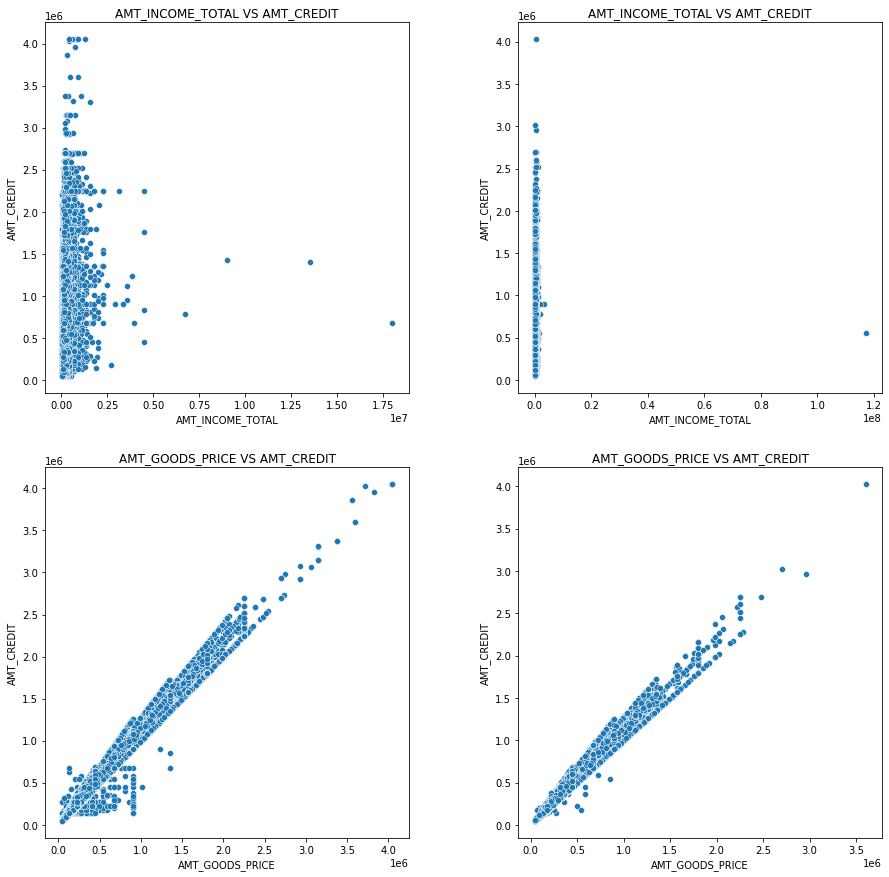

In [76]:
# Scatter plot for numeric columns
plt.figure(figsize=[15,15])
plt.subplots_adjust(wspace=0.3)
plt.subplot(2,2,1)
sns.scatterplot(x= target_0['AMT_INCOME_TOTAL'] , y = target_0['AMT_CREDIT'])
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL VS AMT_CREDIT')

#2
plt.subplot(2,2,2)
sns.scatterplot(x= target_1['AMT_INCOME_TOTAL'] , y = target_1['AMT_CREDIT'])
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL VS AMT_CREDIT')

#3
plt.subplot(2,2,3)
sns.scatterplot(x= target_0['AMT_GOODS_PRICE'] , y = target_0['AMT_CREDIT'])
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE VS AMT_CREDIT')

#4
plt.subplot(2,2,4)
sns.scatterplot(x= target_1['AMT_GOODS_PRICE'] , y = target_1['AMT_CREDIT'])
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE VS AMT_CREDIT')
plt.show()

Those who have paid the loan amount within or on the time are more likely to get higher credits than those who didn't paid the bill on time.
People who have higher goods price and have made payments on time have higher credits than those with higher goods price but didn't pay the loan.

Income Range vs Gender

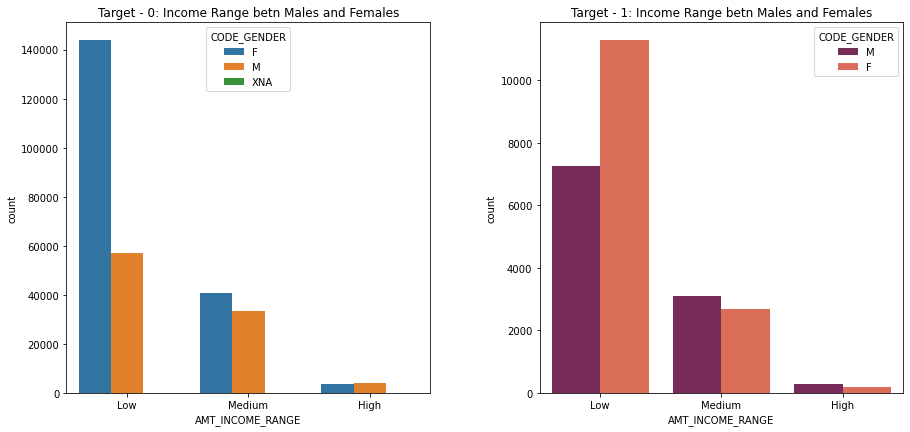

In [77]:
plt.figure(figsize=[15,15])
plt.subplots_adjust(wspace=0.3)
plt.subplot(2,2,1)
sns.countplot(x= target_0 ['AMT_INCOME_RANGE'] , hue= target_0['CODE_GENDER'])
plt.xlabel('AMT_INCOME_RANGE')
plt.title('Target - 0: Income Range betn Males and Females')

#2
plt.subplot(2,2,2)
sns.countplot(x= target_1 ['AMT_INCOME_RANGE'] , hue= target_1['CODE_GENDER'],palette='rocket')
plt.xlabel('AMT_INCOME_RANGE')
plt.title('Target - 1: Income Range betn Males and Females')
plt.show()

Females who have low salary don't have any issues to pay the money rather than men who have medium salary have payment problems.

Credit Amount vs Education Status

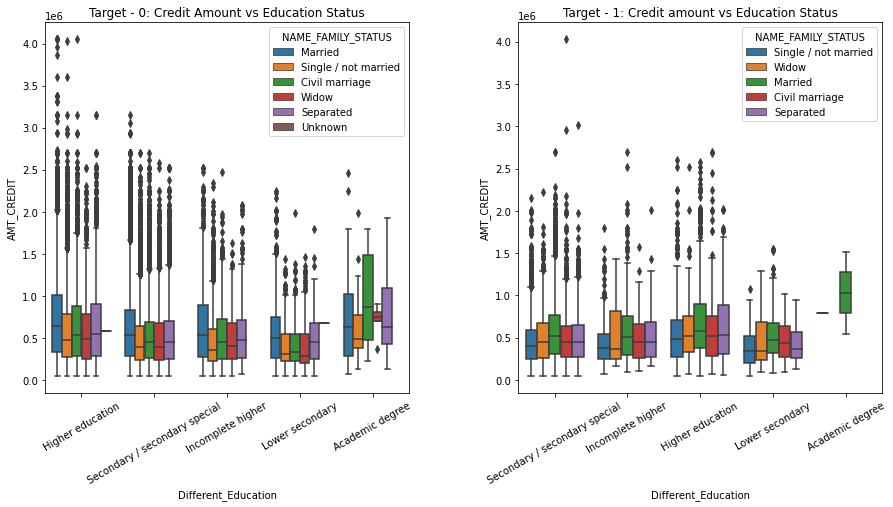

In [78]:
plt.figure(figsize=[15,15])
plt.subplots_adjust(wspace=0.3)
plt.subplot(2,2,1)
sns.boxplot(x= target_0['NAME_EDUCATION_TYPE'] , y = target_0['AMT_CREDIT'], hue= target_0['NAME_FAMILY_STATUS'])
plt.xlabel('Different_Education')
plt.xticks(rotation = 30)
plt.title('Target - 0: Credit Amount vs Education Status')

#2
plt.subplot(2,2,2)
sns.boxplot(x= target_1['NAME_EDUCATION_TYPE'] , y = target_1['AMT_CREDIT'], hue= target_1['NAME_FAMILY_STATUS'])
plt.xlabel('Different_Education')
plt.xticks(rotation = 30)
plt.title('Target - 1: Credit amount vs Education Status')
plt.show()

In [79]:
print(df[['NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE']].describe())
print(df['NAME_FAMILY_STATUS'].value_counts())

       NAME_FAMILY_STATUS            NAME_EDUCATION_TYPE
count              307511                         307511
unique                  6                              5
top               Married  Secondary / secondary special
freq               196432                         218391
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


Single and Married citizens who have completed their higher education are more likely to pay the money on time.
More volume of outliers are visible in Higher Education if compared to others.

### Previous Application

In [80]:
df1 = pd.read_csv('previous_application.csv')
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Removing the column values of 'XNA' and 'XAP'
df1= df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)

df1= df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)

df1= df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [82]:
# Merge the previous application with the current application data frame.
merged_df = pd.merge(df,df1, how= 'inner', on= 'SK_ID_CURR'
                     ,suffixes= '_x')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,Laborers,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,20-30,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,NaN,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,High,Medium,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,40-50,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,MONDAY,13,Y,1,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.0251

In [83]:
# Renaming the column names after merging.
new_df = merged_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT',
'AMT_ANNUITY_':'AMT_ANNUITY', 'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,Laborers,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,20-30,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,NaN,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,High,Medium,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,40-50,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,MONDAY,13,Y,1,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / a

In [84]:
# Removing unwanted columns for analysis

new_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 
'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
'WEEKDAY_APPR_PROCESS_START_PREV','HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT',
'NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

new_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,Laborers,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,20-30,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,NaN,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,Self-employed,0.321745,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,High,Medium,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,40-50,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,40-50,1529558,Cash loans,29053.215,450000.0,555723.0,NaN,450000.0,NaN,NaN,NaN,Repairs,Refused,-449,Cash through the bank,LIMIT,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Distribution of contract status with purposes')

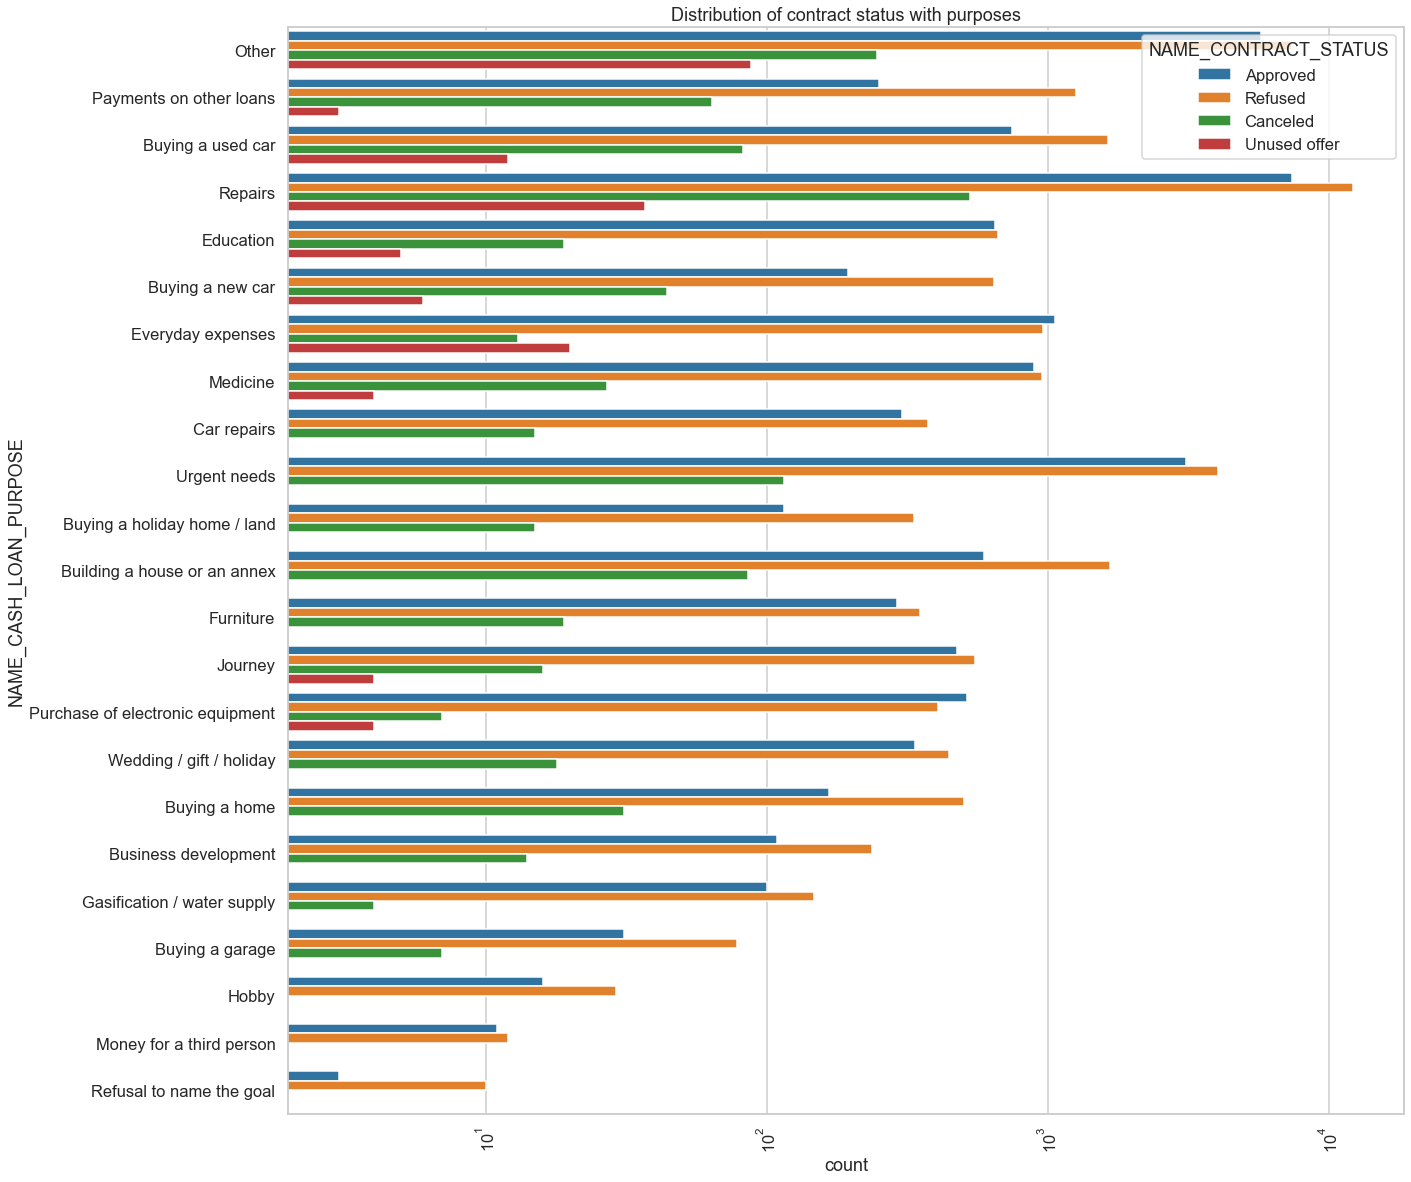

In [85]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=[20,20])
sns.countplot(y=new_df['NAME_CASH_LOAN_PURPOSE'] , hue = new_df['NAME_CONTRACT_STATUS'])
plt.xticks(rotation = 90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')

Loan is approved if the customer wants to utilize the money on "Everyday expenses". However, Rejection rate is higher if a person wants to buy a house, buy a garage and many more. Moreover, Repairs has the biggest Refusal Rate among all the categories. So, the bank can focus on such categories where the proportion of Approval and Refusal is low for eg. Education,Medicine, Furniture, Journey.

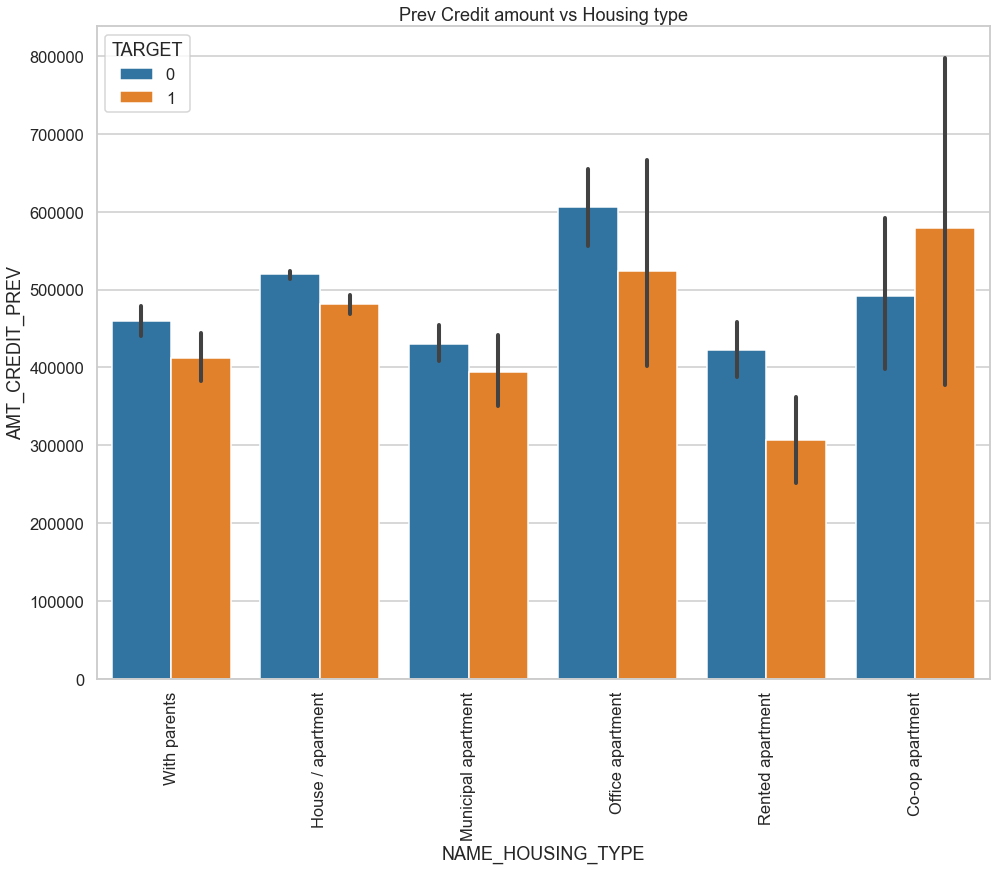

In [86]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(y=new_df['AMT_CREDIT_PREV'],hue=new_df['TARGET'],x=new_df['NAME_HOUSING_TYPE'],)
plt.title('Prev Credit amount vs Housing type')
plt.show()

Bank should avoid giving loans to the housing type of Co-op apartment instead they should focus on providing loans to citizens who leave their parents, leaving in Municipal Apartment and Office Apartment because these categories have good credit score and they are capable to return the payments successfully.

## Conclusion

1. Banks should focus on giving loans to the people who fall in the category of (20 to 50) if they want their money back and the banks must focus on those clients who have less credit because they are willing to make the payment on time.

2. Laborers and Sales staff should be allowed to take loan but of a small credit from the bank as they are considered to make the payments on time.

3. Working people make their payments on time.

4. More number of females should be focused because they tend to return the money on time.

5. Clients from Housing Type who live with their parents should be considered as they have least number of unsuccessful payments.